<a href="https://colab.research.google.com/github/ussalbt/Assignment/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Exercise 1

In [11]:
#H0= 13.20
#H1 <13.20 

In [12]:
n= 40
sigma=2.50
mu= 13.20
xbar = 12.20

In [13]:
z_test= (xbar-mu)/(sigma/np.sqrt(n))
z_test

-2.5298221281347035

In [14]:
pvalue= stats.norm.cdf(z_test)
pvalue

0.005706018193000826

In [15]:
alpha =0.01
if pvalue< alpha:
  print("Reject the H0")#null
else:
  print("Fail to reject H0")

Reject the H0


Exercise 2


In [16]:
α = 0.01

In [101]:
#H0: mu1=mu2
#H1: mu1!= mu2

In [19]:
soil= pd.read_excel("/content/sample_data/soil.xlsx")

In [20]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [21]:
soil.shape

(35, 2)

In [22]:
soil["Soil1"].mean()

1.6918

In [23]:
stats.ttest_ind(soil["Soil1"], soil["Soil2"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [24]:
soil.isnull().value_counts()

Soil1  Soil2
False  False    30
True   False     5
dtype: int64

In [25]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [27]:
soil.isna()

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [28]:
indTest = stats.ttest_ind(soil.dropna()["Soil1"], soil["Soil2"])

indTest


Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [29]:
indTest.statistic #t = 5.13

5.1681473319343345

In [30]:
indTest.pvalue 

2.593228732352821e-06

In [31]:
positive = stats.t.ppf(0.995, 63) # positive t-score of significant level for α = 0.01

positive

2.656145029762259

In [33]:
if indTest.statistic > positive:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


Exercise 3

In [34]:
dfpisa= pd.read_excel("/content/sample_data/2015 PISA Test.xlsx")

In [35]:
dfpisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [36]:
dfpisa[dfpisa['Continent_Code'].isnull()==True]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [37]:
dfpisa['Continent_Code'].fillna(value='NA', inplace = True)

In [38]:
dfpisa[dfpisa['Continent_Code']=='NA'].head(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NA,88.470000,515.6474,526.6678,527.7047
13,CRI,NA,59.762950,400.2534,427.4875,419.6080
18,DOM,NA,54.215766,327.7020,357.7377,331.6388
45,MEX,NA,57.431043,408.0235,423.2765,415.7099
68,USA,NA,74.554202,469.6285,496.9351,496.2424


In [39]:
dfpisa.shape

(70, 6)

In [40]:
dfpisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [41]:
dfpisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

Eu

In [ ]:
dfEU = dfpisa[dfpisa["Continent_Code"]=="EU"]
dfEU.head()

In [43]:
dfpisa[dfpisa["Continent_Code"]=="EU"].describe()


,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [44]:
dfEU.shape

(37, 6)

In [45]:
dfEU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

In [46]:
np.sqrt(1235.550805)

35.15040262927297

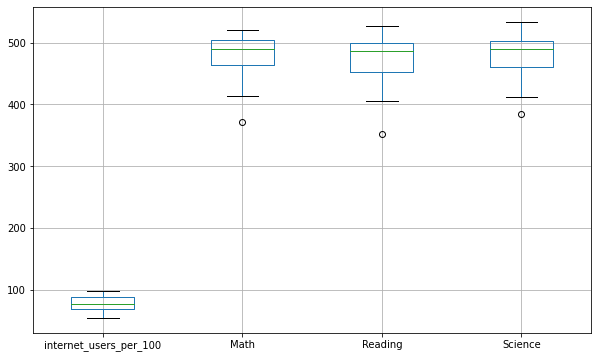

In [47]:
dfEU.boxplot(figsize=(10,6));

In [48]:
dfAS = dfpisa[dfpisa["Continent_Code"]=="AS"]
dfAS

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997
33,ISR,AS,77.352090,469.6695,478.9606,466.5528
35,JOR,AS,60.114383,380.2590,408.1022,408.6691
36,JPN,AS,91.058028,532.4399,515.9585,538.3948
37,KAZ,AS,72.900000,459.8160,427.1410,456.4836
38,KOR,AS,89.648631,524.1062,517.4367,515.8099


In [49]:
dfAS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [50]:
dfAS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

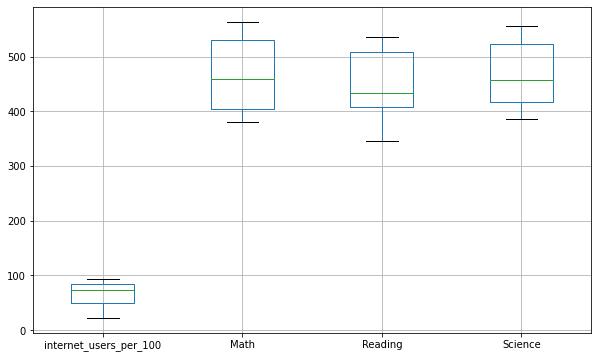

In [51]:
dfAS.boxplot(figsize=(10,6));

In [52]:
dfSA = dfpisa[dfpisa["Continent_Code"]=="SA"]
dfSA

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836
64,TTO,SA,69.198471,417.2434,427.2733,424.5905
67,URY,SA,64.600000,417.9919,436.5721,435.3630


In [53]:
dfSA.shape

(7, 6)

In [54]:
dfSA.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [55]:
dfSA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

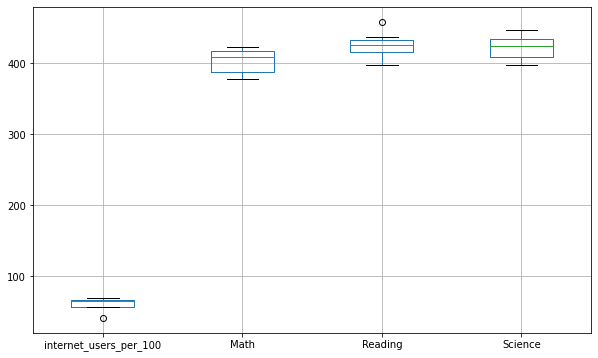

In [56]:
dfSA.boxplot(figsize=(10,6));

In [57]:
dfOC = dfpisa[dfpisa["Continent_Code"]=="OC"]
dfOC

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [58]:
dfOC.shape

(2, 6)

In [59]:
dfOC.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [62]:
dfOC.value_counts()

Country Code  Continent_Code  internet_users_per_100  Math      Reading   Science 
AUS           OC              84.560519               493.8962  502.9006  509.9939    1
NZL           OC              88.222889               495.2233  509.2707  513.3035    1
dtype: int64

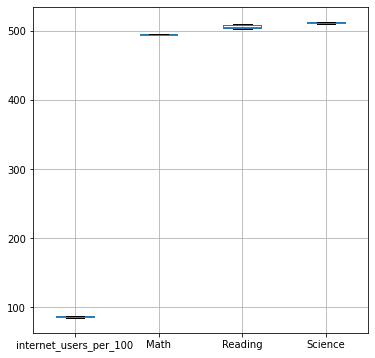

In [63]:
dfOC.boxplot(figsize=(6,6));

In [64]:
dfOC3columns = dfSA[["Math", "Reading", "Science"]]
dfOC3columns

,Math,Reading,Science
2,409.0333,425.3031,432.2262
7,377.0695,407.3486,400.6821
10,422.6714,458.5709,446.9561
12,389.6438,424.9052,415.7288
53,386.5606,397.5414,396.6836
64,417.2434,427.2733,424.5905
67,417.9919,436.5721,435.3630


In [65]:
dfOCinternet = dfOC[["internet_users_per_100"]]
dfOCinternet

,internet_users_per_100
3,84.560519
52,88.222889


In [66]:
dfAF = dfpisa[dfpisa["Continent_Code"]=="AF"]
dfAF

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034


In [67]:
dfAF.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [68]:
dfAF.shape

(2, 6)

In [69]:
dfAF.var()

internet_users_per_100    53.249507
Math                      26.005030
Reading                   62.677447
Science                   56.799679
dtype: float64

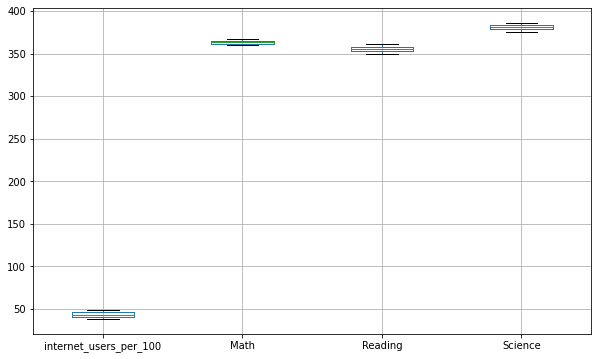

In [70]:
dfAF.boxplot(figsize=(10,6));

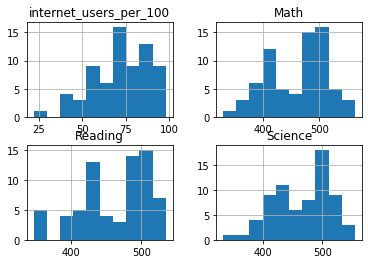

In [71]:
dfpisa.hist();

In [73]:
statistic, pvalue = stats.ttest_ind(dfEU.Math, dfAS.Math, nan_policy='omit')  # independent T test

statistic, pvalue

(0.8700553179679787, 0.38826888111307556)

In [75]:
statistic

0.8700553179679787

In [76]:
pvalue

0.38826888111307556

In [77]:
#fail to reject


Exercise 4

In [78]:
#Ho : μdiff = 0
#H1 : μdiff != 0

In [79]:
dftscores= pd.read_excel("/content/sample_data/students_2014.xlsx")

In [80]:
dftscores.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783.0,1995-03-22,NaT,NaT,NaN,NaN,0.0,0.0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278.0,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0.0,70.66,179.20,0.0,8.004,00:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389.0,1994-12-31,NaT,NaT,NaN,NaN,0.0,0.0,70.68,198.52,0.0,NaN,00:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820.0,1994-12-01,NaT,NaT,NaN,business administration,1.0,0.0,NaN,198.34,NaN,8.473,00:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559.0,1994-11-10,NaT,NaT,NaN,NaN,1.0,1.0,67.43,128.17,2.0,NaN,00:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [81]:
dftscores.shape

(435, 23)

In [82]:
dftscores[["English","Math"]].isna().value_counts()

English  Math 
False    False    398
True     False     24
False    True      11
True     True       2
dtype: int64

In [83]:
dftscoresdrop=dftscores[["English","Math"]].dropna()

In [84]:
dftscoresdrop.isnull().value_counts()

English  Math 
False    False    398
dtype: int64

In [85]:
dftscores[["English","Math"]]

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52
...,...,...
430,87.72,65.31
431,91.01,70.25
432,81.05,58.16
433,75.59,66.84


In [86]:
dftscoresdrop

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52
...,...,...
430,87.72,65.31
431,91.01,70.25
432,81.05,58.16
433,75.59,66.84


In [87]:
dftscores[["English","Math"]].describe()

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [88]:
dftscores["English"].std()

6.839803158182041

In [90]:
dftscores["English"].var()

46.78290724267702

In [89]:
dftscores["Math"].std()

8.37592956204943

In [91]:
dftscores["Math"].var()

70.15619602841355

In [94]:
Engmean= dftscores["English"].mean()
Engmean

82.78755501222493

In [95]:
Matmean=dftscores["Math"].mean()
Matmean

65.46800947867297

In [97]:
Farkmean= Engmean-Matmean
Farkmean

17.31954553355196

In [98]:
stats.ttest_ind(dftscores.dropna()["English"], dftscores.dropna()["Math"])

Ttest_indResult(statistic=10.787205641803522, pvalue=1.1746036768217507e-18)

In [100]:
paired = stats.ttest_rel(dftscores["English"], dftscores["Math"], nan_policy='omit')
paired

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)